In [9]:
%pip install numpy matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
n = np.arange(-5,6)
x = np.array([0, 5, 6 ,7,9,0,0, -5, -9, -7, -6])
print(n)
print(x)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]
[ 0  5  6  7  9  0  0 -5 -9 -7 -6]


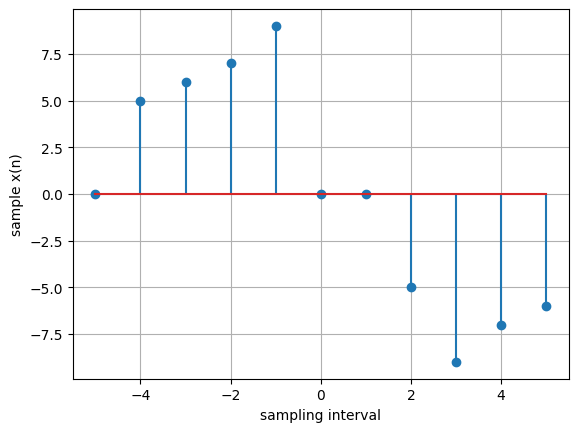

In [27]:
plt.stem(n,x)
plt.xlabel('sampling interval')
plt.ylabel('sample x(n)')
plt.grid(True)
plt.show()

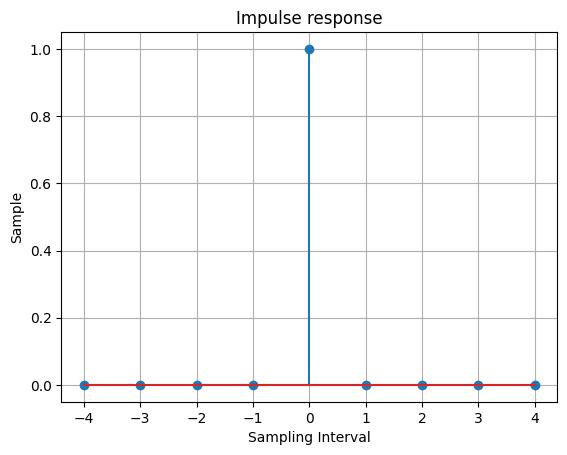

In [18]:
n = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])
xn = ([ 0, 0, 0, 0, 1, 0, 0, 0, 0])
plt.stem(n,xn)
plt.title('Impulse response')
plt.xlabel('Sampling Interval')
plt.ylabel('Sample')
plt.grid(True)
plt.show()

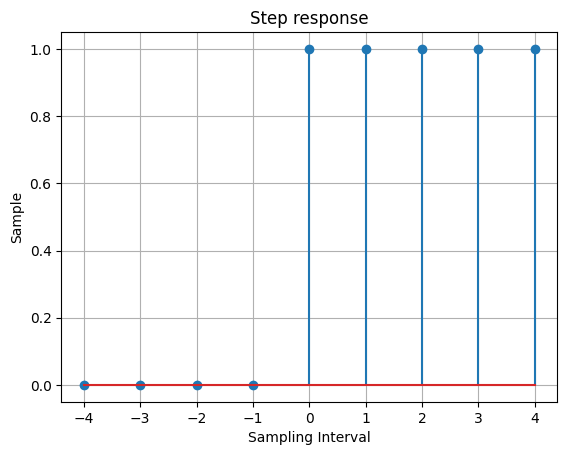

In [12]:
n = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])
xn = ([ 0, 0, 0, 0, 1, 1, 1, 1, 1])
plt.stem(n,xn)
plt.title('Step response')
plt.xlabel('Sampling Interval')
plt.ylabel('Sample')
plt.grid(True)
plt.show()

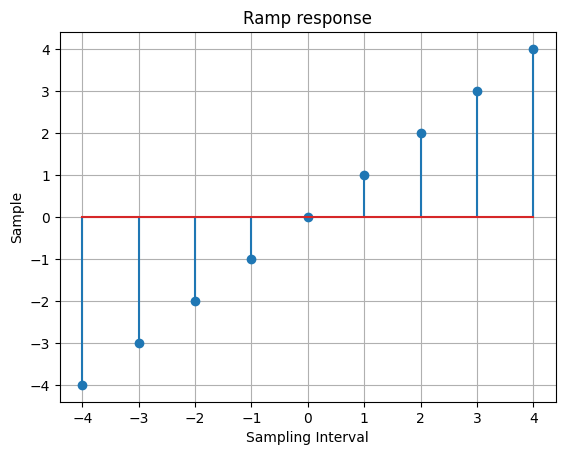

In [31]:
n = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])
xn = ([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.stem(n,xn)
plt.title('Ramp response')
plt.xlabel('Sampling Interval')
plt.ylabel('Sample')
plt.grid(True)
plt.show()

In [33]:
%pip list

Package                 Version
----------------------- -----------
asgiref                 3.8.1
asttokens               3.0.0
colorama                0.4.6
comm                    0.2.3
contourpy               1.3.3
cycler                  0.12.1
debugpy                 1.8.16
decorator               5.2.1
Django                  5.1.3
executing               2.2.0
fonttools               4.59.1
ipykernel               6.30.1
ipython                 9.4.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.8.1
kiwisolver              1.4.9
matplotlib              3.10.5
matplotlib-inline       0.1.7
nest-asyncio            1.6.0
numpy                   2.2.6
opencv-python-headless  4.12.0.88
packaging               25.0
parso                   0.8.4
pillow                  11.3.0
pip                     24.3.1
platformdirs            4.3.8
prompt_toolkit          3.0.51
psutil                  7.0.0
pure_eval           

In [44]:
%pip install opencv-python-headless

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Image width: 3000px
Image height: 4500px
Number of channels: 3


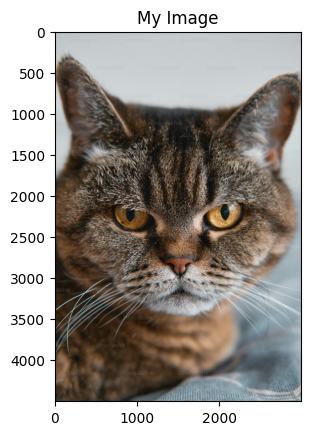

In [ ]:
import cv2 
import matplotlib.pyplot as plt

# Load an image (change 'image.jpg' to your imagee file path)
image = cv2.imread('premium_photo-1667030474693-6d0632f97029.jpg')

# Check if the image was loaded properly
if image is None:
    print("Error: Could not load image.")
else:
    # Get the size of the image+
    height, width, channels = image.shape #[rows, columns, rbg--> [r,g,b]]
    print(f"Image width: {width}px")
    print(f"Image height: {height}px")
    print(f"Number of channels: {channels}")

    # Show the image in a window
    
    image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show the image in the notebook
    plt.imshow(image_gray)
    plt.title("My Image")

    plt.axis('on')  # You can use 'off' to hide axes
    plt.show()


In [52]:
import copy

original = [[1, 2], [3, 4]]
shallow = copy.copy(original)

shallow[0][0] = 99
print(original)  # [[99, 2], [3, 4]]

[[99, 2], [3, 4]]


In [53]:
original = [[1, 2], [3, 4]]
deep = copy.deepcopy(original)

In [54]:
deep[0][0] = 99
print(original)
print(deep)

[[1, 2], [3, 4]]
[[99, 2], [3, 4]]


Detected objects: 19


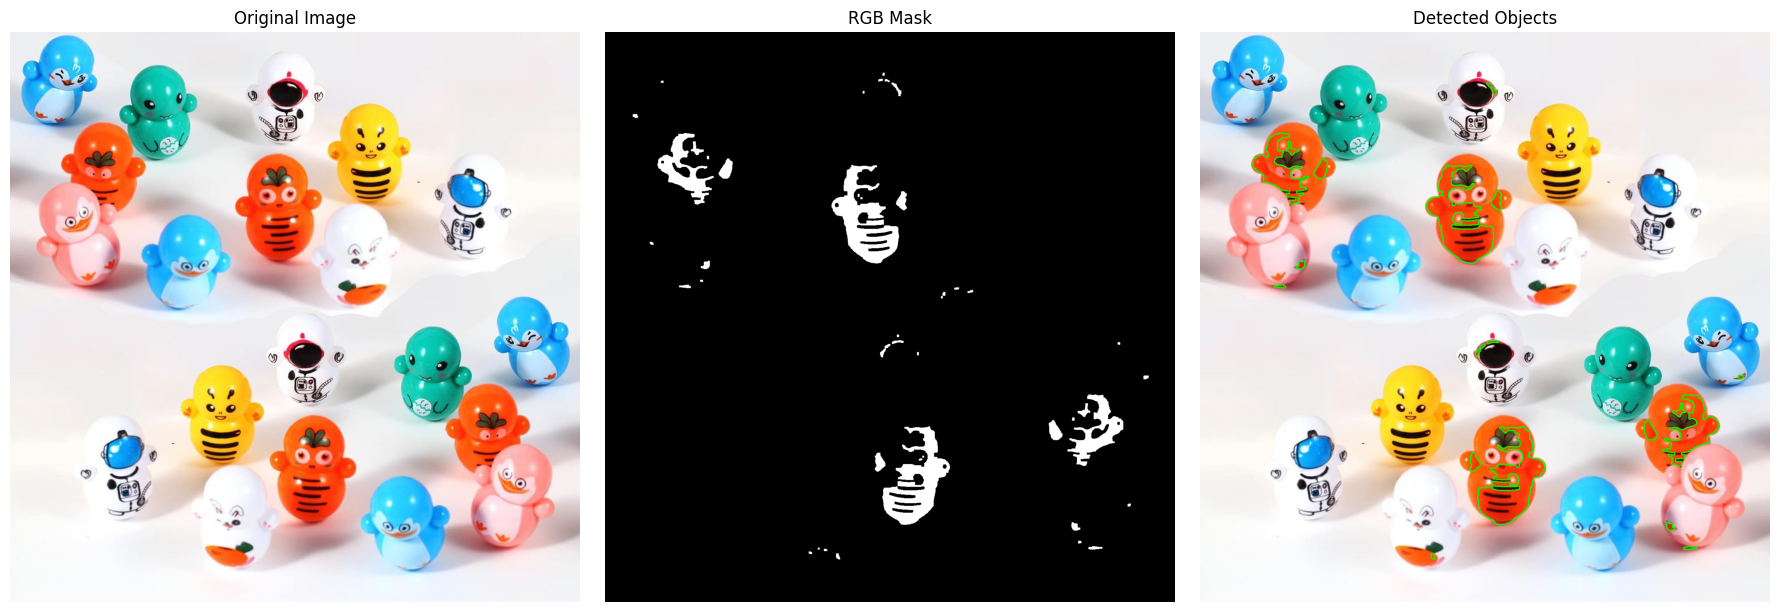

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (replace with your own image path)
image = cv2.imread('toyss.jpg')  # Make sure the image is in your working directory
if image is None:
    print("Error: Could not load image.")
else:
    # Convert to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define RGB color range (example: red objects)
    lower_rgb = np.array([150, 0, 0])
    upper_rgb = np.array([255, 80, 80])

    # Create mask
    mask = cv2.inRange(rgb_image, lower_rgb, upper_rgb)

    # Clean up mask
    kernel = np.ones((5, 5), np.uint8)
    mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(mask_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours
    output_image = rgb_image.copy()
    count = 0
    for contour in contours:
        if cv2.contourArea(contour) > 100:
            count += 1
            cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)

    print(f"Detected objects: {count}")

    # Plotting images inline
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    axs[0].imshow(rgb_image)
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    axs[1].imshow(mask_cleaned, cmap='gray')
    axs[1].set_title("RGB Mask")
    axs[1].axis('off')

    axs[2].imshow(output_image)
    axs[2].set_title("Detected Objects")
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()


In [58]:
%pip install scikit-image 

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 12.9/12.9 MB 73.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 57.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   -------------- ------------------------- 13.9/38.5 MB 62.2 MB/s eta 0:00:01
   ----------------------------- ---------- 28.8/38.5 MB 67.7 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 62.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


33847.0
66713.0
5154.0
39284.0
44389.0
7257.0
21691.0
33724.0
66604.0
5561.0
39150.0
44320.0
7257.0
21662.0


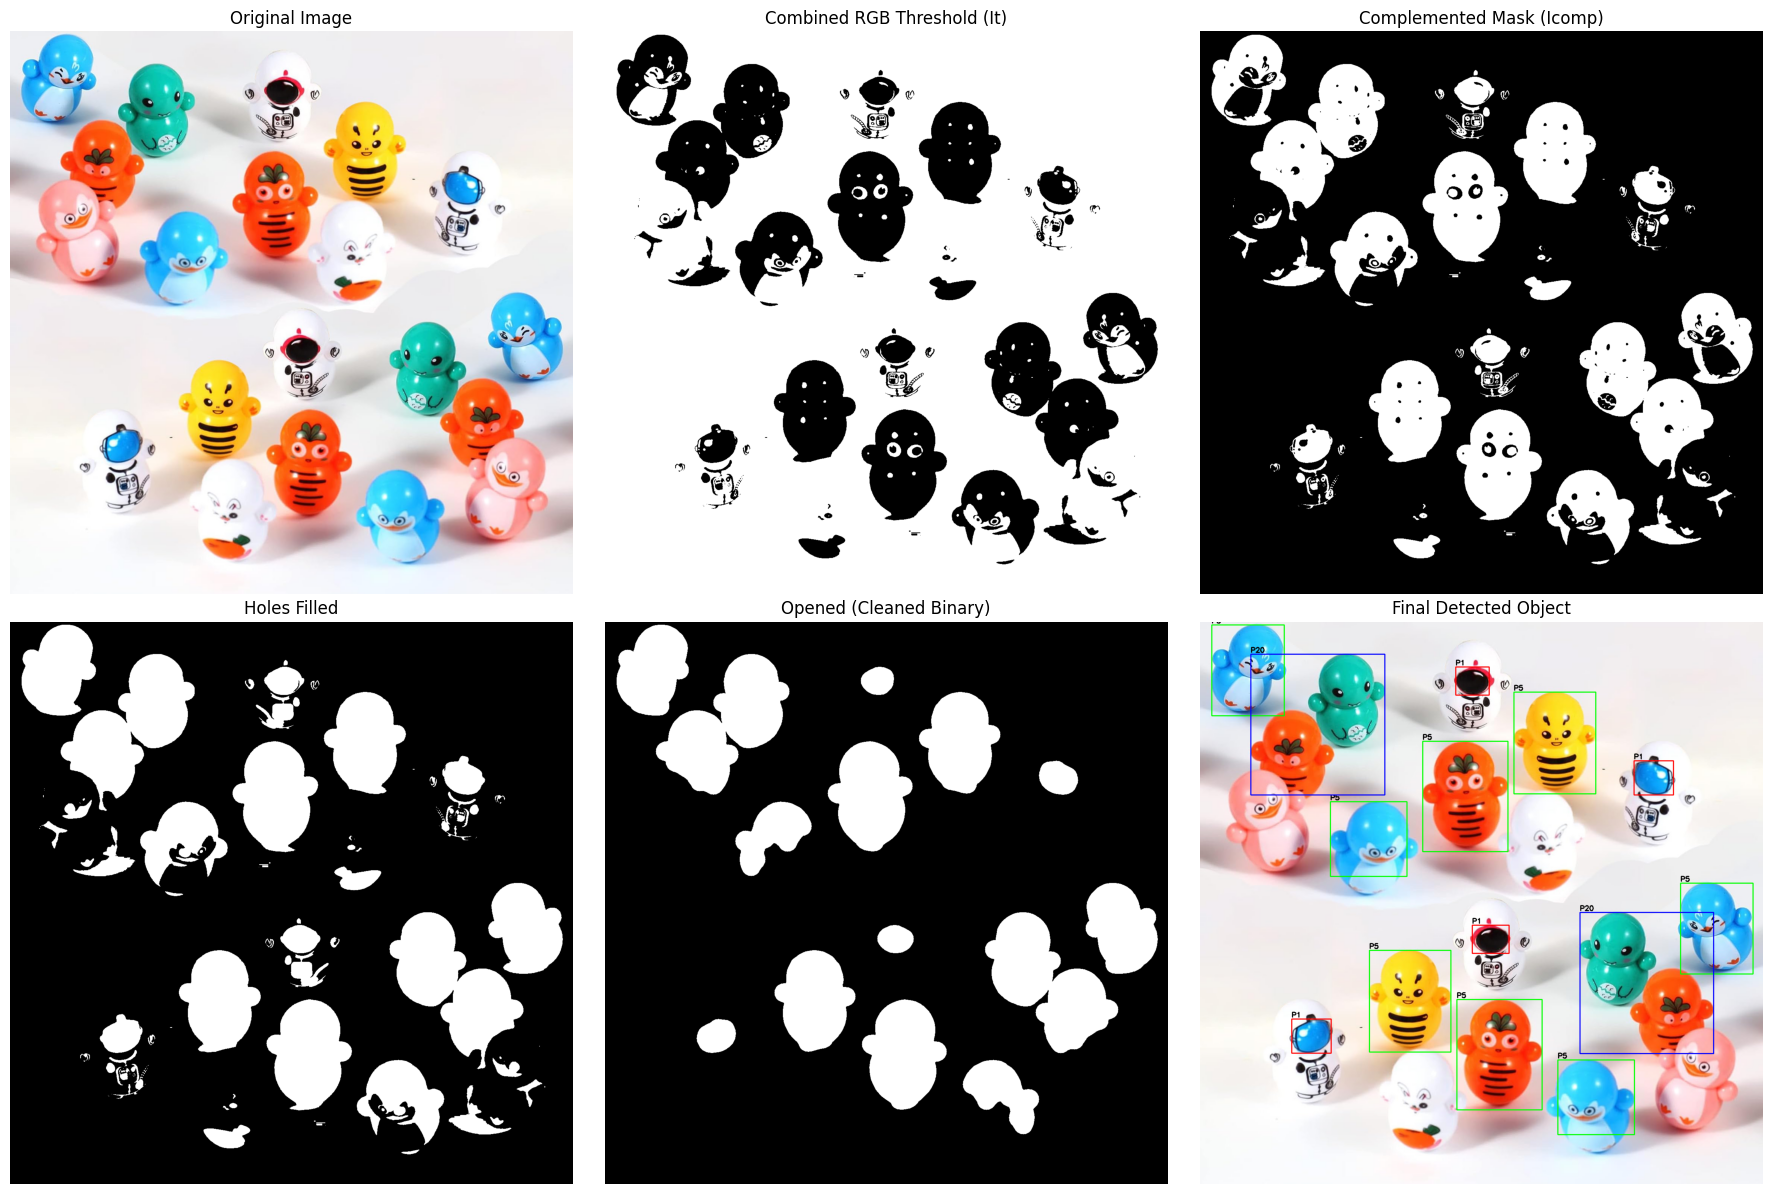

small: 4
medium: 8
large: 2
count: 14


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.morphology import disk, opening
from skimage.util import invert

# Load image
image = cv2.imread('toyss.jpg')
if image is None:
    raise FileNotFoundError("Image not found.")

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract channels
rmat = image_rgb[:, :, 0]
gmat = image_rgb[:, :, 1]
bmat = image_rgb[:, :, 2]

# Threshold levels
levelr = 0.5 * 255
levelg = 0.45 * 255
levelb = 0.5 * 255

# Threshold RGB channels
Ired = (rmat > levelr).astype(np.uint8)
Igreen = (gmat > levelg).astype(np.uint8)
Iblue = (bmat > levelb).astype(np.uint8)

# Combine channels
It = cv2.bitwise_and(cv2.bitwise_and(Ired, Igreen), Iblue)

# Invert mask
Icomp = cv2.bitwise_not(It * 255)

# Fill holes
flood_fill = Icomp.copy()
h, w = flood_fill.shape
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(flood_fill, mask, (0, 0), 255)
filled = cv2.bitwise_or(Icomp, cv2.bitwise_not(flood_fill))

# Morphological open
opened = opening(filled // 255, disk(25)).astype(np.uint8)

# Label connected components
label_image = label(opened)
regions = regionprops(label_image)

###
for region in regions:
        area = region.area
        centroid = region.centroid
        print(area)

# Classify objects
small, medium, large = [], [], []
for region in regions:
    area = region.area
    if area < 14000:
        small.append(region)
    elif area < 45000:
        medium.append(region)
    else:
        large.append(region)

# Draw boxes on copy of image
output_img = image_rgb.copy()
for region in small:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (255, 0, 0), 2)
    cv2.putText(output_img, 'P1', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

for region in medium:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (0, 255, 0), 2)
    cv2.putText(output_img, 'P5', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

for region in large:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (0, 0, 255), 2)
    cv2.putText(output_img, 'P20', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

# Display results side-by-sidee
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")

axs[0, 1].imshow(It, cmap='gray')
axs[0, 1].set_title("Combined RGB Threshold (It)")
axs[0, 1].axis("off")

axs[0, 2].imshow(Icomp, cmap='gray')
axs[0, 2].set_title("Complemented Mask (Icomp)")
axs[0, 2].axis("off")

axs[1, 0].imshow(filled, cmap='gray')
axs[1, 0].set_title("Holes Filled")
axs[1, 0].axis("off")

axs[1, 1].imshow(opened, cmap='gray')
axs[1, 1].set_title("Opened (Cleaned Binary)")
axs[1, 1].axis("off")

axs[1, 2].imshow(output_img)
axs[1, 2].set_title("Final Detected Object")
axs[1, 2].axis("off")

plt.tight_layout()
plt.show()

# Display total value
total_value = len(small)  + len(medium)  + len(large) 
print(f"small: {len(small)}")
print(f"medium: {len(medium)}")
print(f"large: {len(large)}")
print(f"count: {total_value}")


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.morphology import disk, opening
from skimage.util import invert

# Load imagee
image = cv2.imread('coins.jpg')
if image is None:
    raise FileNotFoundError("Image not found.")

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

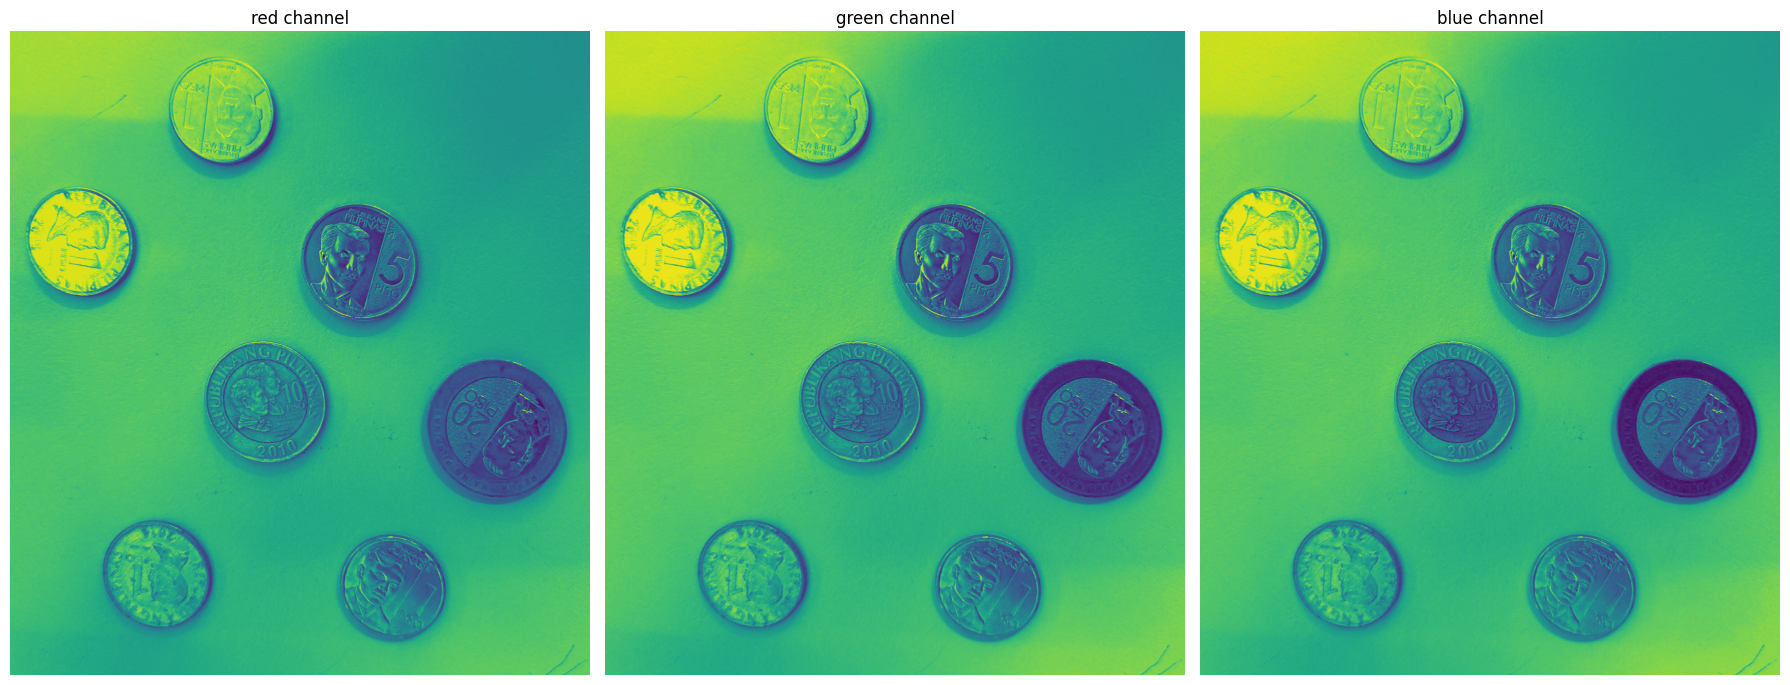

In [4]:
# Extract channels
rmat = image_rgb[:, :, 0]
gmat = image_rgb[:, :, 1]
bmat = image_rgb[:, :, 2]
#show image for each channel
fig, axs = plt.subplots(1, 3, figsize=(18, 12))
axs[0].imshow(rmat)
axs[0].set_title("red channel")
axs[0].axis("off")

axs[1].imshow(gmat)
axs[1].set_title("green channel")
axs[1].axis("off")

axs[2].imshow(bmat)
axs[2].set_title("blue channel")
axs[2].axis("off")

plt.tight_layout()
plt.show()

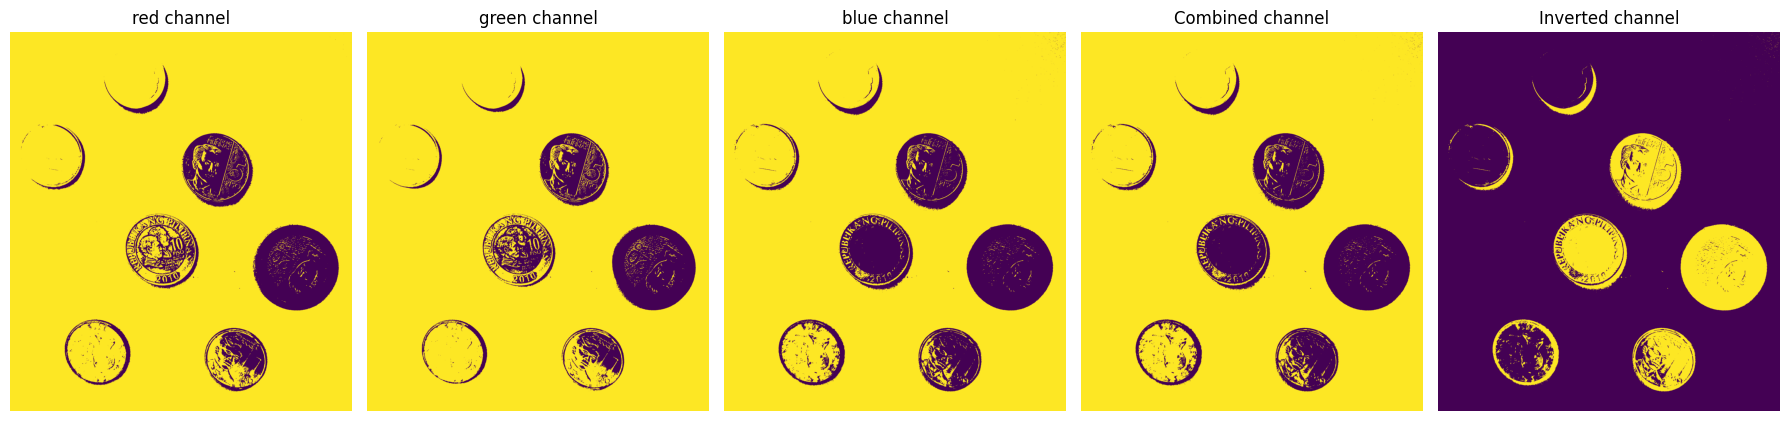

In [5]:
# Threshold levels
levelr = 0.5 * 255
levelg = 0.45 * 255
levelb = 0.5 * 255

# Threshold RGB channels
Ired = (rmat > levelr).astype(np.uint8)
Igreen = (gmat > levelg).astype(np.uint8)
Iblue = (bmat > levelb).astype(np.uint8)

# Combine channels
It = cv2.bitwise_and(cv2.bitwise_and(Ired, Igreen), Iblue)

# Invert mask
Icomp = cv2.bitwise_not(It * 255)

#show image for each channel
fig, axs = plt.subplots(1, 5, figsize=(18, 12))
axs[0].imshow(Ired)
axs[0].set_title("red channel")
axs[0].axis("off")

axs[1].imshow(Igreen)
axs[1].set_title("green channel")
axs[1].axis("off")

axs[2].imshow(Iblue)
axs[2].set_title("blue channel")
axs[2].axis("off")

axs[3].imshow(It)
axs[3].set_title("Combined channel")
axs[3].axis("off")

axs[4].imshow(Icomp)
axs[4].set_title("Inverted channel")
axs[4].axis("off")

plt.tight_layout()
plt.show()

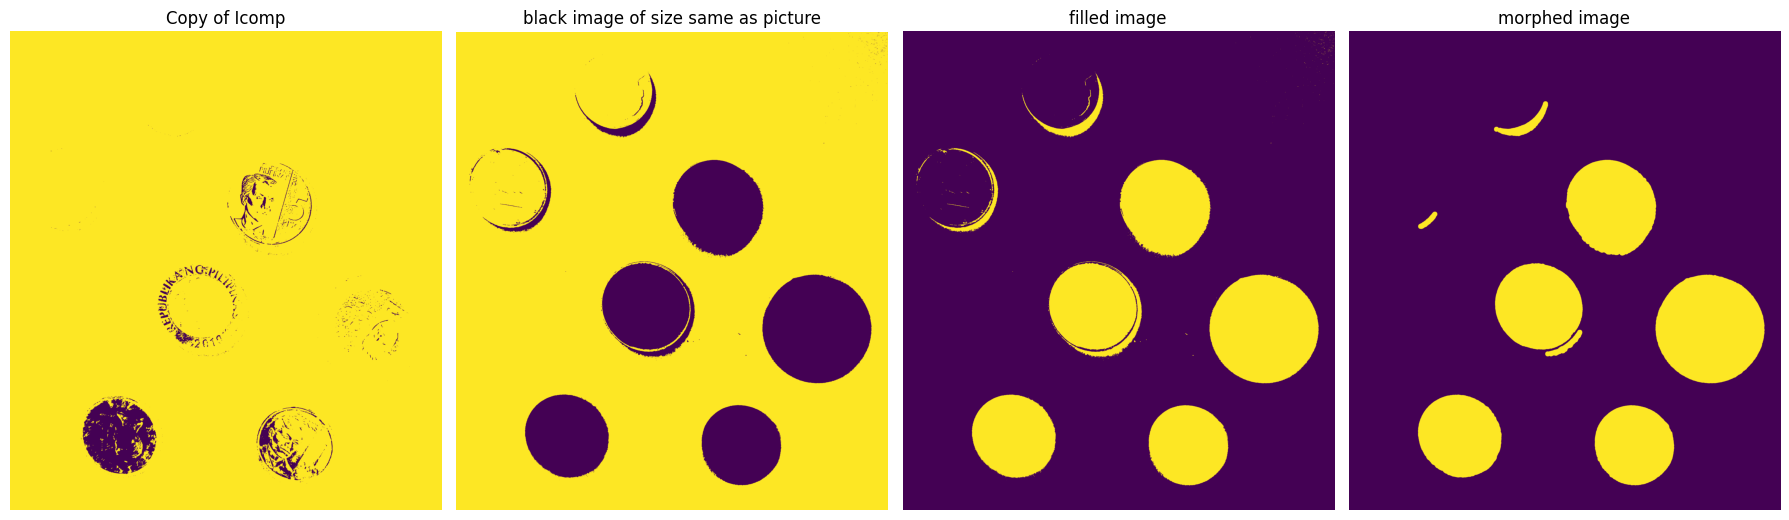

16855.0
234098.0
4476.0
209542.0
327668.0
9068.0
191580.0
177000.0


In [6]:
# Fill holes
flood_fill = Icomp.copy()
h, w = flood_fill.shape
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(flood_fill, mask, (0, 0), 255)
filled = cv2.bitwise_or(Icomp, cv2.bitwise_not(flood_fill))

# Morphological open
opened = opening(filled // 255, disk(15)).astype(np.uint8)

# Label connected components
label_image = label(opened)
regions = regionprops(label_image)

#show image for each channel
fig, axs = plt.subplots(1, 4, figsize=(18, 12))
axs[0].imshow(flood_fill)
axs[0].set_title("Copy of Icomp")
axs[0].axis("off")

axs[1].imshow(mask)
axs[1].set_title("black image of size same as picture")
axs[1].axis("off")

axs[2].imshow(filled)
axs[2].set_title("filled image")
axs[2].axis("off")

axs[3].imshow(opened)
axs[3].set_title("morphed image")
axs[3].axis("off")


plt.tight_layout()
plt.show()
###
for region in regions:
        area = region.area
        print(area)

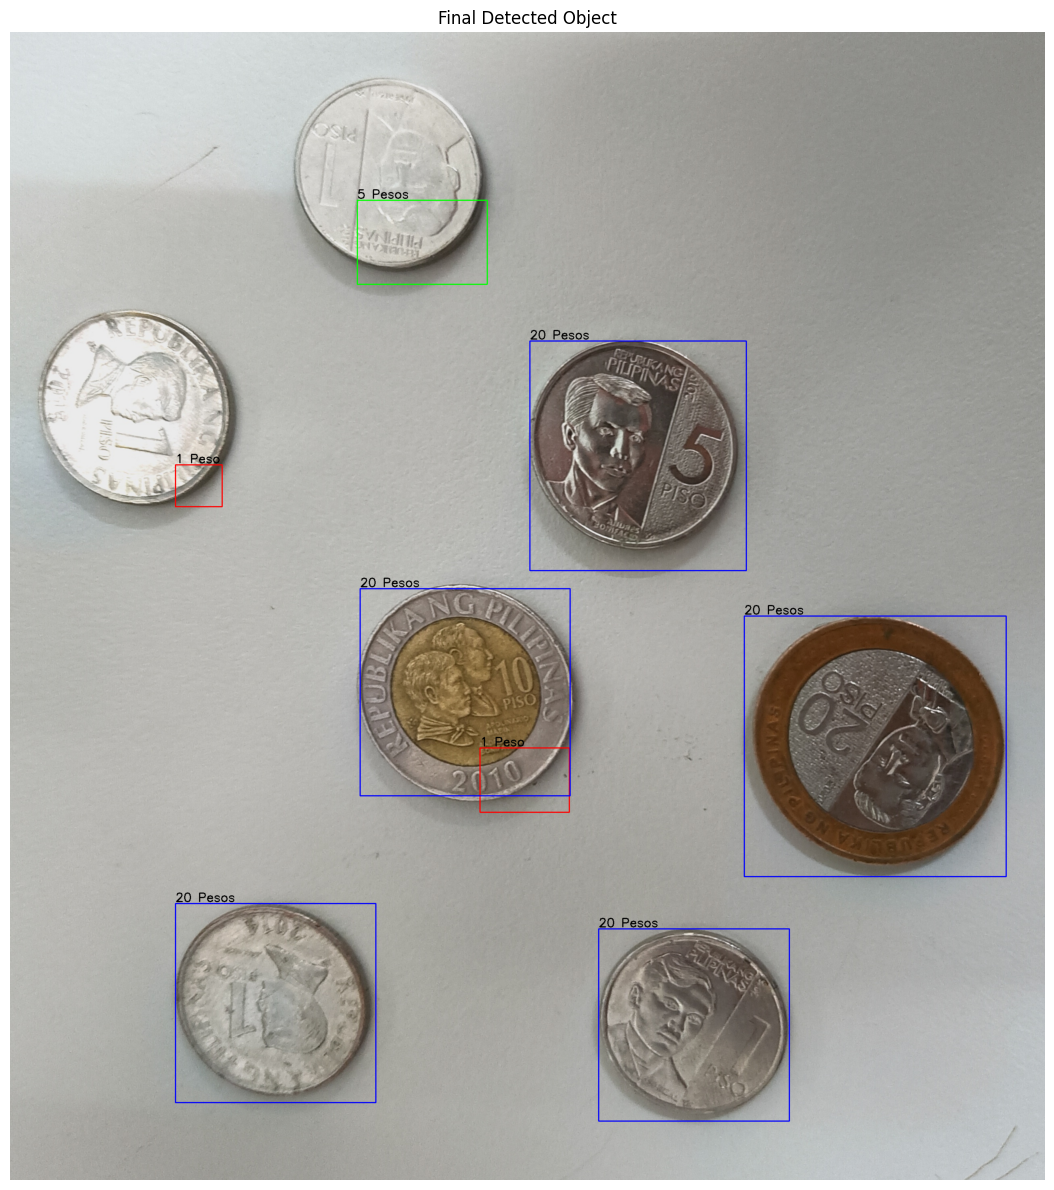

1 Peso: 2
1 Peso: 1
20 Pesos: 5
count: 8


In [11]:
# Classify objects
small, medium, large = [], [], []
for region in regions:
    area = region.area
    if area < 14000:
        small.append(region)
    elif area < 45000:
        medium.append(region)
    else:
        large.append(region)

# Draw boxes on copy of image
output_img = image_rgb.copy()
for region in small:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (255, 0, 0), 2)
    cv2.putText(output_img, '1 Peso', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

for region in medium:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (0, 255, 0), 2)
    cv2.putText(output_img, '5 Pesos', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

for region in large:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (0, 0, 255), 2)
    cv2.putText(output_img, '20 Pesos', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

# Display results side-by-side
fig, axs = plt.subplots(1, 1, figsize=(18, 12))

axs.imshow(output_img)
axs.set_title("Final Detected Object")
axs.axis("off")

plt.tight_layout()
plt.show()

# Display total value
total_value = len(small)  + len(medium)  + len(large) 
print(f"1 Peso: {len(small)}")
print(f"1 Peso: {len(medium)}")
print(f"20 Pesos: {len(large)}")
print(f"count: {total_value}")

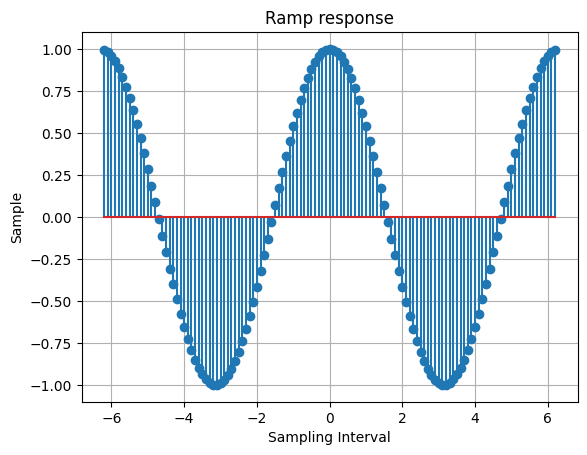

In [99]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-6.2,6.3,0.1) #1 and #2. n = np.arange(-3.1,3.2,0.1), #3 and #4 n = np.arange(-6.2,6.3,0.1)
xn = np.cos(n) #1 np.sin(n) #2 np.cos(n) #3 np.sin(n) #4 np.cos(n) 
plt.stem(n,xn)
plt.title('Ramp response') #Sin wave/ Cosine wave
plt.xlabel('Sampling Interval')
plt.ylabel('Sample')
plt.grid(True)
plt.show()

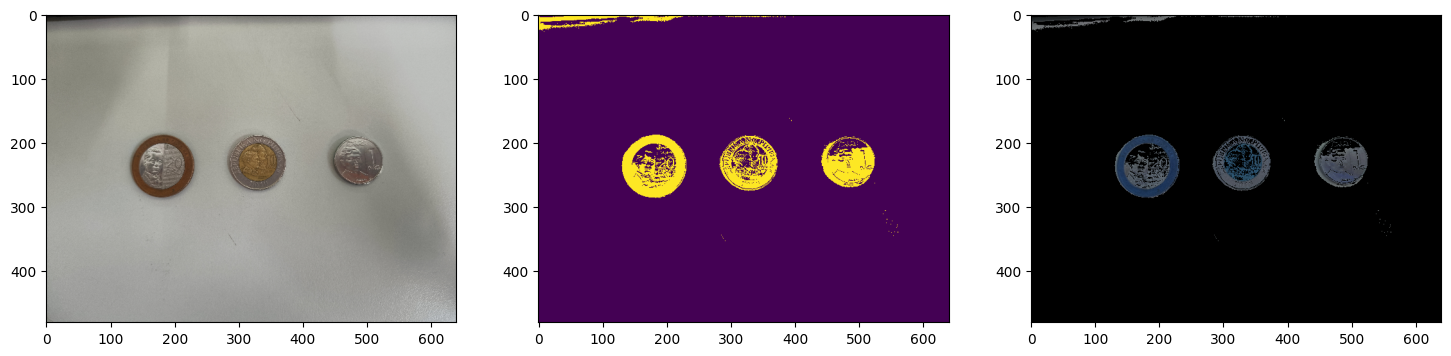

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread('1000058044.jpg')
image = cv2.resize(image, (640, 480))  # Resize if needed

# Convert to HSV
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the red color range in HSV
# Red can span across the 0 and 180 boundaries, so we need two ranges
lower_red1 = np.array([0, 10, 10])
upper_red1 = np.array([110, 130, 120])

lower_red2 = np.array([0, 40, 20])
upper_red2 = np.array([200, 230, 120])

# Create masks
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

# Combine both masks
red_mask = cv2.bitwise_or(mask1, mask2)

# Apply the mask to the original image
red_result = cv2.bitwise_and(image, image, mask=red_mask)

fig, axs = plt.subplots(1, 3, figsize=(18, 12))
# Display the results
axs[0].imshow(image_rgb)
axs[1].imshow(red_mask)
axs[2].imshow(red_result)
